In [6]:
import numpy as np
import matplotlib.pyplot as plt
from nn.classifiers.fc_net_split3_3 import *
from nn.data_utils import get_CIFAR10_data
from nn.data_utils_mnist import *
from nn.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from nn.solver import Solver
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
data = get_MNIST_data(test_trinary=1,train_trinary=1,val_trinary=1,noise_amplitude=0.0,no_of_levels=9)
for k, v in data.iteritems():
  print '%s: ' % k, v.shape



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(60000,)
0.0
255.0
(50000, 28, 28)
14.1666666667
240.833333333
X_val:  (10000, 28, 28)
X_train:  (50000, 28, 28)
X_test:  (10000, 28, 28)
y_val:  (10000,)
y_train:  (50000,)
y_test:  (10000,)


In [7]:
X=data['X_train']

In [8]:
print X.shape

(50000, 28, 28)


In [11]:
##for nonsplitted 784-512: lr=0.001924, std=0.006602, regu=0.000000 train accuracy is : 0.981000 val acc:  0.974500
##no decay lr=0.000714, std=0.007321,regu=0.000000 train accuracy is : 0.984000 val acc:  0.977100
##lr=0.001511, std=0.014804, regu=0.002256 train accuracy is : 0.991000 val acc:  0.974800
for i in range(100):

    regu=10**np.random.uniform(-4,-1)
    #regu=0
    learning_rate = 10**np.random.uniform(-4,-2)
    weight_scale = 10**np.random.uniform(-3,-1)
    dec = np.random.uniform(0.95,1)

    model = FourLayerNet(input_dim=28*28, ##hidden_dim=256,
              weight_scale=weight_scale, reg=regu, activation=3, scores_activation=3,external_load=1,levels=9)
    solver = Solver(model,data,
                print_every=10, num_epochs=60, batch_size=100,
                update_rule='sgd_momentum',lr_decay=dec,verbose = False,
                optim_config={
                  'learning_rate': learning_rate
                }
         )
    
    solver.train()

    print 'lr=%f, std=%f, regu=%f ,dec= %f train accuracy is : %f val acc:  %f' %(learning_rate, weight_scale, regu, dec,solver.train_acc_history[-1], solver.val_acc_history[-1])
 

    model = FourLayerNet(input_dim=28*28,  
              weight_scale=weight_scale, reg=regu,activation=3, scores_activation=3,external_load=1,levels=9)
    solver = Solver(model,data,
                print_every=4000, num_epochs=60, batch_size=100, 
                update_rule='sgd_momentum',lr_decay=1.0,verbose =False, #lr_decay=0.0,
                optim_config={
                  'learning_rate': learning_rate
                }
         )
    solver.train()
    print ' no decay lr=%f, std=%f,regu=%f train accuracy is : %f val acc:  %f' %(learning_rate, weight_scale,regu, solver.train_acc_history[-1], solver.val_acc_history[-1])
 


#solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')

nn/layers.py:237: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


KeyboardInterrupt: 

In [7]:
##lr=0.001003, std=0.023134, regu=0.001509 ,dec= 0.996284 train accuracy is : 0.991000 val acc:  0.977300

regu=0.001509
    #regu=0
learning_rate = 0.001003
weight_scale = 0.023134
dec = 0.996284

model = FourLayerNet(input_dim=28*28, ##hidden_dim=256,
              weight_scale=weight_scale, reg=regu, activation=3, scores_activation=3,external_load=1,levels=9)
solver = Solver(model,data,
                print_every=10, num_epochs=60, batch_size=100,
                update_rule='sgd_momentum',lr_decay=dec,verbose = False,
                optim_config={
                  'learning_rate': learning_rate
                }
         )
    
solver.train()

print 'lr=%f, std=%f, regu=%f ,dec= %f train accuracy is : %f val acc:  %f' %(learning_rate, weight_scale, regu, dec,solver.train_acc_history[-1], solver.val_acc_history[-1])
 


lr=0.001003, std=0.023134, regu=0.001509 ,dec= 0.996284 train accuracy is : 0.991000 val acc:  0.977300


In [8]:
y_test_pred = np.argmax(model.loss(data['X_test'],noise=0,test=1), axis=1)
y_val_pred = np.argmax(model.loss(data['X_val']), axis=1)
print 'Validation set accuracy: ', (y_val_pred == data['y_val']).mean()
print 'Test set accuracy: ', (y_test_pred == data['y_test']).mean()
y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1), axis=1)
print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()

par=1
aa=0.0
for i in range(0,20):
  y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1,noise2=1, parallel_samples_output=par), axis=1)
  #print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()
  aa=aa+ (y_test_pred == data['y_test']).mean()
print aa/20

par=2
aa=0.0
for i in range(0,20):
  y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1,noise2=1, parallel_samples_output=par), axis=1)
  #print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()
  aa=aa+ (y_test_pred == data['y_test']).mean()
print aa/20


par=3
aa=0.0
for i in range(0,20):
  y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1,noise2=1, parallel_samples_output=par), axis=1)
  #print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()
  aa=aa+ (y_test_pred == data['y_test']).mean()
print aa/20

par=4
aa=0.0
for i in range(0,20):
  y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1,noise2=1, parallel_samples_output=par), axis=1)
  #print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()
  aa=aa+ (y_test_pred == data['y_test']).mean()
print aa/20

par=8
aa=0.0
for i in range(0,20):
  y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1,noise2=1, parallel_samples_output=par), axis=1)
  #print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()
  aa=aa+ (y_test_pred == data['y_test']).mean()
print aa/20

par=16
aa=0.0
for i in range(0,20):
  y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1,noise2=1, parallel_samples_output=par), axis=1)
  #print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()
  aa=aa+ (y_test_pred == data['y_test']).mean()
print aa/20

par=24
aa=0.0
for i in range(0,20):
  y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1,noise2=1, parallel_samples_output=par), axis=1)
  #print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()
  aa=aa+ (y_test_pred == data['y_test']).mean()
print aa/20

Validation set accuracy:  0.9774
Test set accuracy:  0.9737
Noisy test set accuracy:  0.9722
0.971415
0.97162
0.97182
0.97193
0.97212
0.972075
0.972295


 no decay lr=0.000819, std=0.019935,regu=0.000106 train accuracy is : 0.996000 val acc:  0.977700


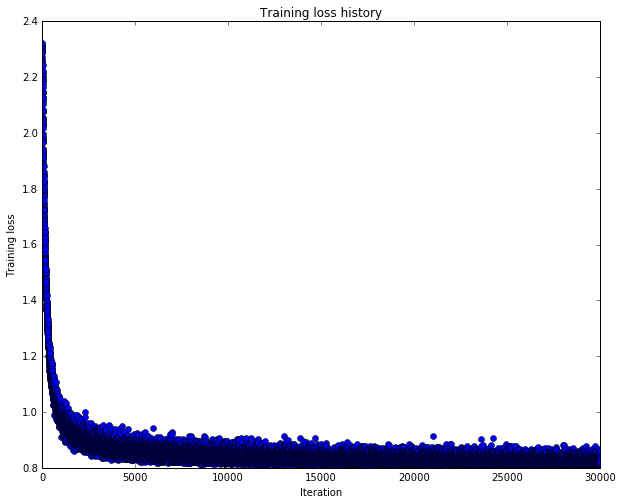

In [3]:
#no decay lr=0.000819, std=0.019935,regu=0.000106 train accuracy is : 0.989000 val acc:  0.979200

regu=0.000106
    #regu=0
learning_rate = 0.000819
weight_scale = 0.019935
    

model = ThreeLayerNet(input_dim=28*28,  ##hidden_dim=256,
              weight_scale=weight_scale, reg=regu,activation=3, scores_activation=3,external_load=1,levels=9)
solver = Solver(model,data,
                print_every=4000, num_epochs=60, batch_size=100, 
                update_rule='sgd_momentum',lr_decay=1.0,verbose =False, #lr_decay=0.0,
                optim_config={
                  'learning_rate': learning_rate
                }
         )
solver.train()
print ' no decay lr=%f, std=%f,regu=%f train accuracy is : %f val acc:  %f' %(learning_rate, weight_scale,regu, solver.train_acc_history[-1], solver.val_acc_history[-1])
 

In [4]:
y_test_pred = np.argmax(model.loss(data['X_test'],noise=0,test=1), axis=1)
y_val_pred = np.argmax(model.loss(data['X_val']), axis=1)
print 'Validation set accuracy: ', (y_val_pred == data['y_val']).mean()
print 'Test set accuracy: ', (y_test_pred == data['y_test']).mean()
y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1), axis=1)
print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()

par=1
aa=0.0
for i in range(0,20):
  y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1,noise2=1, parallel_samples_output=par), axis=1)
  #print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()
  aa=aa+ (y_test_pred == data['y_test']).mean()
print aa/20

par=2
aa=0.0
for i in range(0,20):
  y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1,noise2=1, parallel_samples_output=par), axis=1)
  #print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()
  aa=aa+ (y_test_pred == data['y_test']).mean()
print aa/20


par=3
aa=0.0
for i in range(0,20):
  y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1,noise2=1, parallel_samples_output=par), axis=1)
  #print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()
  aa=aa+ (y_test_pred == data['y_test']).mean()
print aa/20

par=4
aa=0.0
for i in range(0,20):
  y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1,noise2=1, parallel_samples_output=par), axis=1)
  #print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()
  aa=aa+ (y_test_pred == data['y_test']).mean()
print aa/20

par=8
aa=0.0
for i in range(0,20):
  y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1,noise2=1, parallel_samples_output=par), axis=1)
  #print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()
  aa=aa+ (y_test_pred == data['y_test']).mean()
print aa/20

par=16
aa=0.0
for i in range(0,20):
  y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1,noise2=1, parallel_samples_output=par), axis=1)
  #print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()
  aa=aa+ (y_test_pred == data['y_test']).mean()
print aa/20

par=24
aa=0.0
for i in range(0,20):
  y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1,noise2=1, parallel_samples_output=par), axis=1)
  #print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()
  aa=aa+ (y_test_pred == data['y_test']).mean()
print aa/20

Validation set accuracy:  0.9793
Test set accuracy:  0.9767
Noisy test set accuracy:  0.9762
0.97422
0.97487
0.975005
0.9752
0.975425
0.975525
0.97555


In [5]:
np.save('W1_1ext784-256-256-10-9level', model.params['W1_1'])
np.save('b1_1ext784-256-256-10-9level', model.params['b1_1'])
np.save('W1_2ext784-256-256-10-9level', model.params['W1_2'])
np.save('b1_2ext784-256-256-10-9level', model.params['b1_2'])
np.save('W1_3ext784-256-256-10-9level', model.params['W1_3'])
np.save('b1_3ext784-256-256-10-9level', model.params['b1_3'])
np.save('W1_4ext784-256-256-10-9level', model.params['W1_4'])
np.save('b1_4ext784-256-256-10-9level', model.params['b1_4'])
np.save('W2ext784-256-256-10-9level', model.params['W2'])
np.save('b2ext784-256-256-10-9level', model.params['b2'])

In [3]:
y= np.array(range(0,28*28*10))
print y.shape

print y[0], y[1231]
y2= np.reshape(y,(10,28,28))
print y2.shape
print y2[0,0,0], y2[0,0,1], y2[1,0,0], y2[0,1,0]

y3 = np.reshape(y2, (y2.shape[0],-1))
print y3.shape


(7840,)
0 1231
(10, 28, 28)
0 1 784 28
(10, 784)


In [48]:
##no decay lr=0.000986, std=0.004749,regu=0.000312 train accuracy is : 0.989000 val acc:  0.979100
regu=0.000312
learning_rate = 0.000986
weight_scale = 0.004749


model = TwoLayerNet(hidden_dim=256,input_dim=28*28,
weight_scale=weight_scale, reg=regu,activation=3, scores_activation=3)
solver = Solver(model,data,
                print_every=4000, num_epochs=60, batch_size=100,
                update_rule='sgd_momentum',lr_decay=1.0,verbose =False, #lr_decay=0.0,
                optim_config={
                  'learning_rate': learning_rate
                }
         )
solver.train()
print ' no decay lr=%f, std=%f,regu=%f train accuracy is : %f val acc:  %f' %(learning_rate, weight_scale,regu, solver.train_acc_history[-1], solver.val_acc_history[-1])
 

 no decay lr=0.000986, std=0.004749,regu=0.000312 train accuracy is : 0.984000 val acc:  0.976300


In [98]:
y_test_pred = np.argmax(model.loss(data['X_test'],noise=0,test=1), axis=1)
y_val_pred = np.argmax(model.loss(data['X_val']), axis=1)
print 'Validation set accuracy: ', (y_val_pred == data['y_val']).mean()
print 'Test set accuracy: ', (y_test_pred == data['y_test']).mean()
y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1), axis=1)
print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()

y_test_pred = np.argmax(model.loss(data['X_test'],noise=1,test=1,noise2=1, parallel_samples_output=32), axis=1)
print 'Noisy test set accuracy: ', (y_test_pred == data['y_test']).mean()

Validation set accuracy:  0.9772
Test set accuracy:  0.9742
Noisy test set accuracy:  0.9743
Noisy test set accuracy:  0.9706
